|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Digital Assessment:|3|

## Question1. Use the MNIST dataset and do necessary pre-processing, and split the data into training, validation, and testing sets. Create a new ANN model with appropriate hidden layers and output layer neurons. Choose appropriate activation functions. Choose the error function appropriately and use SGD as the optimizer. Include early stopping technique in your model and run the model for 500 epochs and report the Performance.

### Importing the necessary libraries

In [38]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

### Loading the MNIST Dataset

In [39]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

### Displaying Random Images

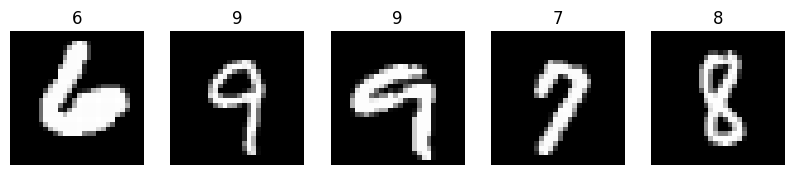

In [40]:
class_names = [str(i) for i in range(10)]
indices = np.random.choice(len(x_train), size = 5 , replace = False)
    
plt.figure(figsize = (2*5,3))
for i, idx in enumerate(indices):
    ax = plt.subplot(1,5,i+1)
    img = x_train[idx]
    plt.imshow(img, cmap = 'gray')
    label = class_names[y_train[idx]]
    plt.title(label)
    plt.axis('off')
plt.show()

In [41]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2, random_state=42, stratify=y_train
)

print(f"X_train shape: {x_train.shape}")
print(f"X_valid shape: {x_val.shape}")
print(f"X_test shape: {x_test.shape}")


print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (48000, 28, 28)
X_valid shape: (12000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (48000,)
y_valid shape: (12000,)
y_test shape: (10000,)


### Building the ANN Model

In [42]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
sgd = SGD(learning_rate= 0.01, momentum=0.9)
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_train,y_train,batch_size=128, epochs = 500, verbose = 1, validation_data=(x_val,y_val), callbacks=[estop])

Epoch 1/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5860 - loss: 1.2496 - val_accuracy: 0.9233 - val_loss: 0.2554
Epoch 2/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8955 - loss: 0.3440 - val_accuracy: 0.9447 - val_loss: 0.1780
Epoch 3/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9253 - loss: 0.2481 - val_accuracy: 0.9555 - val_loss: 0.1487
Epoch 4/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9389 - loss: 0.2023 - val_accuracy: 0.9625 - val_loss: 0.1249
Epoch 5/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9488 - loss: 0.1700 - val_accuracy: 0.9670 - val_loss: 0.1131
Epoch 6/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9540 - loss: 0.1538 - val_accuracy: 0.9707 - val_loss: 0.1025
Epoch 7/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9582 - loss: 0.1383 - val_accuracy: 0.9699 - val_loss: 0.1021
Epoch 8/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9599 - loss: 0.1319 - val_accu

In [45]:
loss, val_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0817


In [46]:
print(f"Test Accuracy with ANN model: {val_accuracy*100:.4f}%")

Test Accuracy with ANN model: 98.0700%


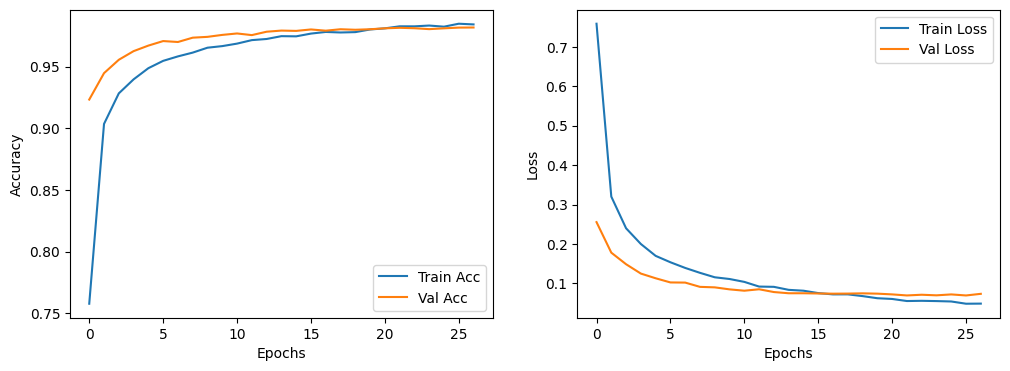

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


### Question 2: Now refit the model with three learning rate schedulers, linear, polynomialdecay and exponentialdecay and report the answers. The fitting should be done with early stopping on.

In [48]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape = (28,28)))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))
    return model


In [49]:
import keras.optimizers

initial_lr = 0.01

## Linear decay
linear_decay = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate= initial_lr, 
    decay_steps= 10000,
    end_learning_rate=0.0,
    power = 1.0
)

## Polynomial Decay
polynomial_decay = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=10000,
    end_learning_rate=0.0001,
    power = 2.0
)

## Exponential Decay
exponential_decay = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,
    decay_rate=0.9
)

schedulers = {
    "Linear Decay": linear_decay,
    "Polynomial Decay": polynomial_decay,
    "Exponential Decay": exponential_decay
}

In [50]:
results = {}
for name, schedule in schedulers.items():
    sgd = SGD(learning_rate=schedule, momentum=0.9)
    print(f"\nTraining with {name} learning rate schedular:\n")
    model = build_model()
    model.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(x_train,y_train, validation_data=(x_val,y_val), batch_size=128, epochs = 500, callbacks=[estop], verbose = 1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} - Test Accuracy: {test_acc*100:.4f}%, Test Loss: {test_loss:.4f}")
    
    # Store results
    results[name] = {
        "history": history.history,
        "test_acc": test_acc,
        "test_loss": test_loss
    }




Training with Linear Decay learning rate schedular:

Epoch 1/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5811 - loss: 1.2293 - val_accuracy: 0.9234 - val_loss: 0.2504
Epoch 2/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8992 - loss: 0.3363 - val_accuracy: 0.9457 - val_loss: 0.1758
Epoch 3/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9253 - loss: 0.2468 - val_accuracy: 0.9551 - val_loss: 0.1467
Epoch 4/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9383 - loss: 0.2063 - val_accuracy: 0.9619 - val_loss: 0.1266
Epoch 5/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9471 - loss: 0.1791 - val_accuracy: 0.9657 - val_loss: 0.1171
Epoch 6/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9522 - loss: 0.1595 - val_accuracy: 0.9703 - val_loss: 0.1044
Epoch 7/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9584 - loss: 0.1340 - val_accuracy: 0.9722 - val_loss: 0.0980
Epoch 8/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s

### Plotting loss and accuracy curves

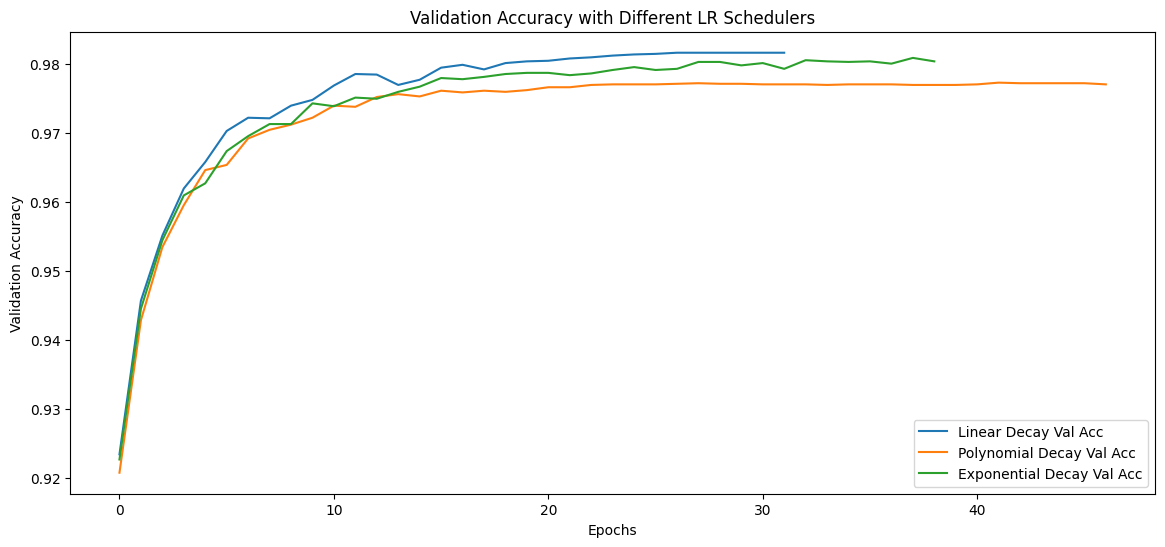

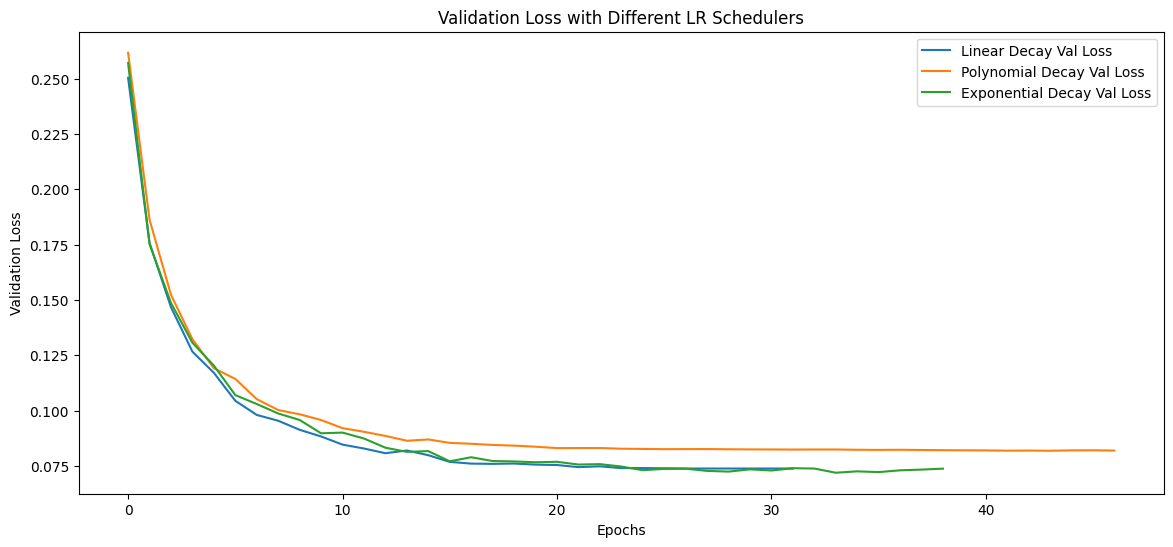

In [51]:
plt.figure(figsize=(14,6))

# Accuracy comparison
for name, res in results.items():
    plt.plot(res["history"]["val_accuracy"], label=f"{name} Val Acc")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy with Different LR Schedulers")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))

# Loss comparison
for name, res in results.items():
    plt.plot(res["history"]["val_loss"], label=f"{name} Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss with Different LR Schedulers")
plt.legend()
plt.show()


In [52]:
for name, res in results.items():
    print(f"\n{name}:")
    print(f"  Final Test Accuracy = {res['test_acc']*100:.4f}%")
    print(f"  Final Test Loss     = {res['test_loss']:.4f}")


Linear Decay:
  Final Test Accuracy = 98.0200%
  Final Test Loss     = 0.0670

Polynomial Decay:
  Final Test Accuracy = 97.6400%
  Final Test Loss     = 0.0770

Exponential Decay:
  Final Test Accuracy = 98.1600%
  Final Test Loss     = 0.0633


## Question 3: Optimizer Comparison
### Report the best optimizer that would result in the best performance for the above models. Try at least three to four optimizers (e.g., SGD with momentum, RMSprop, Adam). Train the same model architecture with each optimizer. Compare their performances. Report which optimizer gives the best results

In [53]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

In [54]:
from keras.optimizers import SGD, Adam, RMSprop,Adamax
optimizers = {
    "SGD": SGD(learning_rate=0.01, momentum=0.9),
    "RMSprop": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001),
    "Adamax": Adamax(learning_rate=0.002)
}

estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)

In [55]:
results = {}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer:\n")
    
    model = build_model()
    model.compile(optimizer=optimizer, 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size=128,
        epochs=500,
        callbacks=[estop],
        verbose=1
    )
    # Evaluating on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} - Test Accuracy: {test_acc*100:.4f}%, Test Loss: {test_loss:.4f}")
    
    results[name] = {
        "history": history.history,
        "test_acc": test_acc,
        "test_loss": test_loss
    }


Training with SGD optimizer:

Epoch 1/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5820 - loss: 1.2470 - val_accuracy: 0.9237 - val_loss: 0.2473
Epoch 2/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8986 - loss: 0.3402 - val_accuracy: 0.9463 - val_loss: 0.1743
Epoch 3/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9257 - loss: 0.2489 - val_accuracy: 0.9560 - val_loss: 0.1439
Epoch 4/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9385 - loss: 0.2056 - val_accuracy: 0.9617 - val_loss: 0.1243
Epoch 5/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9465 - loss: 0.1781 - val_accuracy: 0.9647 - val_loss: 0.1170
Epoch 6/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9536 - loss: 0.1527 - val_accuracy: 0.9693 - val_loss: 0.1026
Epoch 7/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9600 - loss: 0.1366 - val_accuracy: 0.9712 - val_loss: 0.1001
Epoch 8/500
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0

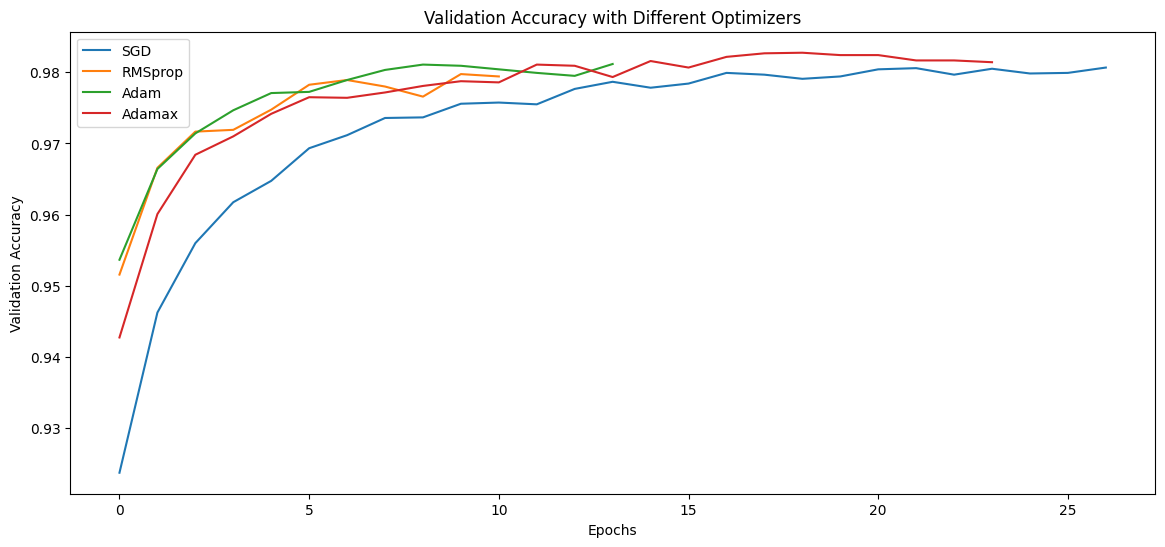

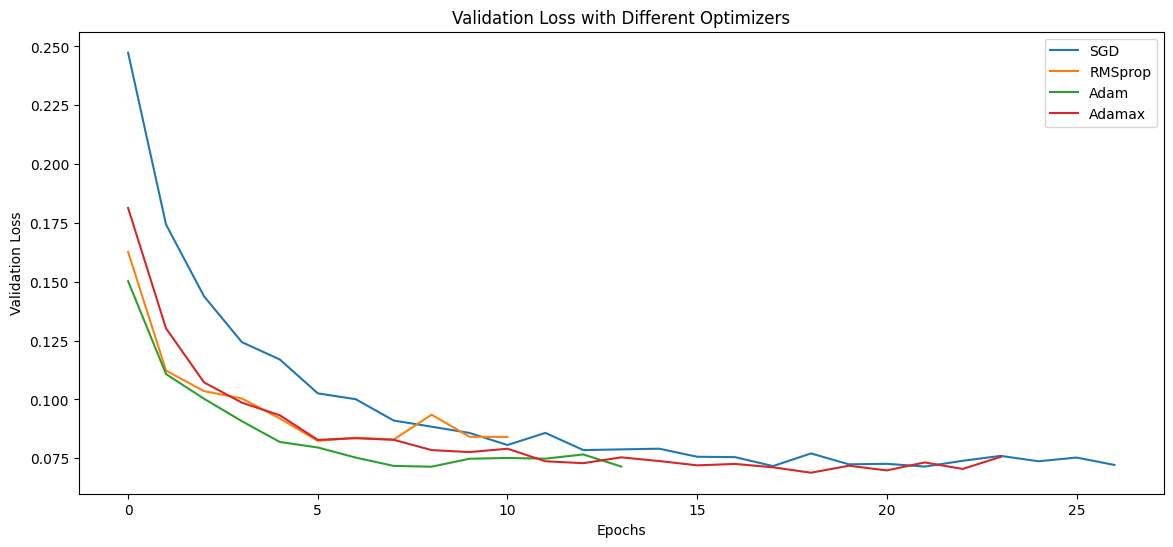

In [56]:
plt.figure(figsize=(14,6))
for name, res in results.items():
    plt.plot(res["history"]["val_accuracy"], label=f"{name}")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy with Different Optimizers")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for name, res in results.items():
    plt.plot(res["history"]["val_loss"], label=f"{name}")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss with Different Optimizers")
plt.legend()
plt.show()

In [57]:
for name, res in results.items():
    print(f"\n{name}:")
    print(f"\tFinal Test Accuracy = {res['test_acc']*100:.4f}%")
    print(f"\tFinal Test Loss     = {res['test_loss']:.4f}")


SGD:
	Final Test Accuracy = 98.1900%
	Final Test Loss     = 0.0638

RMSprop:
	Final Test Accuracy = 97.8600%
	Final Test Loss     = 0.0766

Adam:
	Final Test Accuracy = 97.9700%
	Final Test Loss     = 0.0671

Adamax:
	Final Test Accuracy = 98.1300%
	Final Test Loss     = 0.0676


- Adamax Optimizer gives the best test accuracy